# ASTR 412 - Week 8:  "Building a Sample for Citizen Science"

In today's class, we will walk through the basic steps required to select a sample of galaxies from the SDSS, save their images to your SciDrive, and upload them into your own unique citizen science project on [Zooniverse](http://zooniverse.org).  We will then build a basic project to enable your friends and family to help contribute to answering a science question of your determination.



## I. Importing SciServer and other important libraries
The SciServer team has written a number of libraries, generally prefixed with "SciServer", that assist in various functions. As with all Python libraries, they must be actively imported before being used.
The next code block imports those, together with some standard Python libraries helpful for scientific analysis. The code block below applies some settings you may find helpful.

In [1]:
# Import Python libraries to work with SciServer
import SciServer.CasJobs as CasJobs # query with CasJobs
import SciServer.SciDrive as SciDrive   # read/write to/from SciDrive
import SciServer.SkyServer as SkyServer   # show individual objects and generate thumbnail images through SkyServer
print('SciServer libraries imported')

SciServer libraries imported


In [2]:
# Import other libraries for use in this notebook.
import numpy as np                  # standard Python lib for math ops
from scipy.misc import imsave       # save images as files
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
import os                           # manage local files in your Compute containers
print('Supporting libraries imported')

# Apply some special settings to the imported libraries
# ensure columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

Supporting libraries imported
Settings applied


## II. Querying an astronomy database (SDSS DR14)
The next code block searches the SDSS Data Release 14 database via the CasJobs REST API. The query completes quickly, so it uses CasJobs quick mode.
CasJobs also has an asynchronous mode, which will submit job to a queue and will store the results in a table in your MyDB. If your results are very large, it will store the results in MyScratchDB instead.
Run the code block below to query DR14. Try changing some of the query parameters in step to see the effect on the results returned.
Documentation on the SciServer Python libraries can be found at our documentation site at:
http://www.sciserver.org/docs
make example with batch query mode.

An extensive tutorial on how to query the SDSS database can be found here:
http://skyserver.sdss.org/dr14/en/help/howto/search/searchhowtohome.aspx

In [3]:
# Find objects in the Sloan Digital Sky Survey's Data Release 14.
#
# Query the Sloan Digital Sky Serveys' Data Release 14.
# For the database schema and documentation see http://skyserver.sdss.org/dr14
#
# This query finds "a 4x4 grid of nice-looking galaxies": 
#   galaxies in the SDSS database that have a spectrum 
#   and have a size (petror90_r) larger than 10 arcsec.
# 
# First, store the query in an object called "query"
query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.g, p.r
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17  AND p.petror90_r > 10
"""
gals = CasJobs.executeQuery(query, "dr14")
gals = gals.set_index('objId')
gals

,ra,dec,petror90_r,g,r
objId,,,,,
1237648704060522809,229.819255,-0.348952,13.37864,16.48531,15.55070
1237648704060194961,229.096258,-0.301431,12.31381,16.24018,15.30426
1237648704059670794,227.904169,-0.272948,12.31584,15.77915,15.21295
1237648704059605350,227.732359,-0.323543,12.50706,16.13194,15.22100
1237648704059605287,227.696820,-0.348313,17.94836,16.32172,15.98503
1237648704059474127,227.466899,-0.384698,14.89521,15.34469,14.35898
1237648704059342956,227.104249,-0.268631,16.22666,16.67396,15.64959
1237648704059342955,227.107328,-0.266261,16.69542,16.01340,15.01123
1237648704058949875,226.184087,-0.351967,12.04161,16.10600,15.20950


#### EXPERIMENT:  What happens if you change the query?

Try changing the query in the following ways: 
- Return 8 matching objects insetad of 16.
- Select only nearby galaxies (redshift < 0.05).
- Select only galaxies likely to be spirals (with u-r color >= 2.22)
- Search for galaxies in SDSS Data Release 10 instead of DR14.

What changes do you notice in the table of returned results?

Try it in the code block below:

In [4]:
# Find objects in the Sloan Digital Sky Survey's Data Release 14.
# First, store the query in an object called "query"
query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.g, p.r
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17
  AND p.petror90_r > 10
"""
gals = CasJobs.executeQuery(query, "dr14")
gals = gals.set_index('objId')
gals

,ra,dec,petror90_r,g,r
objId,,,,,
1237645943978393694,55.123625,0.872487,18.85110,16.52947,15.61466
1237645943979114622,56.847420,0.875488,15.66479,15.89510,14.91003
1237645943979311221,57.248385,0.925979,14.60275,16.25293,15.26318
1237646588246688297,80.135126,1.186679,11.14294,16.93802,15.98980
1237648672921485632,243.708876,-0.915653,15.01578,15.69639,14.77024
1237648672922337955,245.700633,-0.844301,10.51866,16.38026,15.51751
1237648672922468973,246.015172,-0.902869,10.80825,16.31037,15.54011
1237648673459077169,245.367353,-0.457074,11.18379,16.31978,15.37991
1237648673459667002,246.695626,-0.510111,10.27149,16.81185,16.32209


# III. Visualizing the Data
Now that we have run the query and stored the results, we can start analyzing the results.

Start by making a simple plot of positions, using the default query from the previous code block (select top 16... AND p.petror90_r > 10).

What do you see?

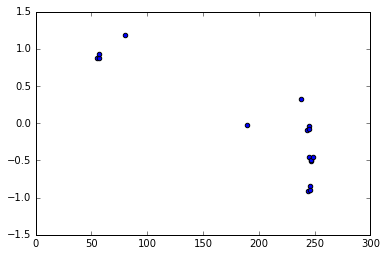

In [5]:
# Try making an Ra, Dec scatter plot...

plt.scatter(gals['ra'], gals['dec'])
plt.show() 

#### EXPERIMENT: How can you improve the graph?

The graph you just made visualizes your data in the simplets possible way: as a scatterplot of (ra/dec) positions with default graphing parameters. But you could make many other possible graphs, and you can always add labels, change axis scales, or adjust many other features of graphs. You practiced making some of these display changes in the sections above. Full details on all the possible graph options are described in the online documentation for the pyplot module at http://matplotlib.org/api/pyplot_summary.html.


Try changing the code block below in the following ways. What changes do you notice in the plot?
- Add axis labels
- Change the scales of both axes to zoom in on the cluster of points around ra = 250
- Increase the font size of the numbers and the axis labels
- Add a title above the graph
- Plot galaxies out to dec = +/-5 (change the display axes as well)

Next, try making some other plots. Add any labels and titles that will help the reader interpret your graphs.
- Plot a histogram of the g-band magnitudes
- Plot a color-color diagram with g on the x-axis and r on the y-axis
- Create graphs with 1,000 objects instead of just 16 (note this will require changing the query above and re-running both blocks)

Try it in the code block below:

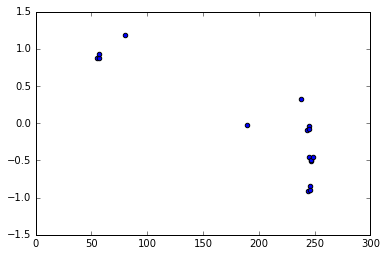

In [6]:
# make scatterplot
#plt.scatter(gals['g'],gals['r'])

# create an overall figure object (fig) and an "axis" object to display this data (ax)
fig, ax = plt.subplots()

# This graph is associated with the axis object
ax.scatter(gals['ra'], gals['dec'])

# Add formatting options here. Some may apply to fig and others to ax.

# Show the graph will all the options you set.
plt.show()

# IV. Store results in your container for later use
The next code block saves the data table "gals" as an HD5 file and as a CSV file.

To see these files, go back to your iPython notebook dashboard (the page from which you opened this notebook). Make sure you are in the persistent folder. You should see your files there. Click on the file names to preview.


In [7]:
# store result as HDF5 file 
h5store = pandas.HDFStore('GalaxyThumbSample.h5')
h5store['galaxies']=gals
h5store.close()

# store result as CSV file
gals.to_csv('GalaxyThumbSample.csv')

print ("Done.")

Done.


### Experiment: Saving files
Using the code block below (a copy of the one above), try the following:

- Change the name of the file
- Save the file as tab-separated variable (.tsv) instead of the default comma-separated variable (.csv).

Documentation on the Pandas package's DataFrame.to_csv method:
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html

In [8]:
# store result as HDF5 file 
h5store = pandas.HDFStore('GalaxyThumbSample.h5')
h5store['galaxies']=gals
h5store.close()

# store result as CSV file
gals.to_csv('GalaxyThumbSample.csv')

print ("Done.")

Done.



# V. Retrieve thumbnail cutouts of galaxies and show them on screen
SkyServer has a service that will produce a color image cutout of certain dimensions around a specified position, displayed as a JPG thumbnail.

The code below iterates through each galaxy in your results and calls the image cutout generator for each galaxy. The scale of the image depends on the Petrosian radius of the galaxy.

Getting image 1 of 16...
Getting image 2 of 16...
Getting image 3 of 16...
Getting image 4 of 16...
Getting image 5 of 16...
Getting image 6 of 16...
Getting image 7 of 16...
Getting image 8 of 16...
Getting image 9 of 16...
Getting image 10 of 16...
Getting image 11 of 16...
Getting image 12 of 16...
Getting image 13 of 16...
Getting image 14 of 16...
Getting image 15 of 16...
Getting image 16 of 16...
Plotting images...


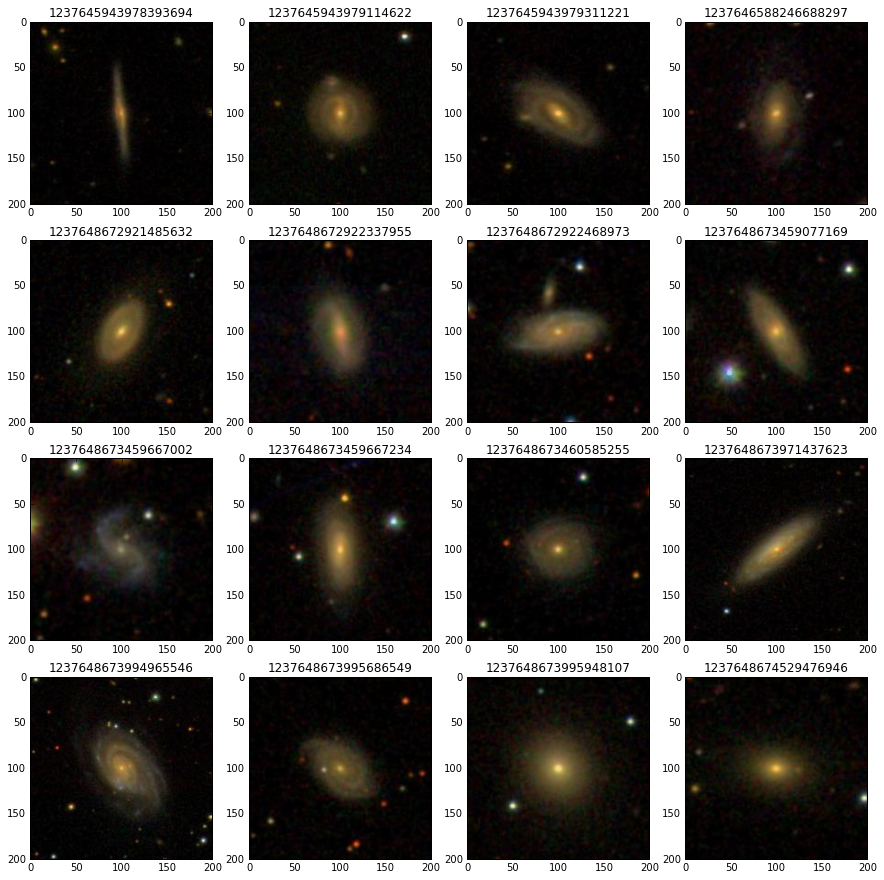

In [9]:
# set thumbnail parameters
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale
plt.figure(figsize=(15, 15))   # display in a 4x4 grid
subPlotNum = 1

i = 0
nGalaxies = len(gals)
for index,gal in gals.iterrows():           # iterate through rows in the DataFrame
    i = i + 1
    print('Getting image '+str(i)+' of '+str(nGalaxies)+'...')
    if (i == nGalaxies):
        print('Plotting images...')
    scale=2*gal['petror90_r']/pixelsize/width
    img = SkyServer.getJpegImgCutout(ra=gal['ra'], dec=gal['dec'], width=width, height=height, scale=scale,dataRelease='DR14')
    plt.subplot(4,4,subPlotNum)
    subPlotNum += 1
    plt.imshow(img)                               # show images in grid
    plt.title(index)                            # show the object identifier (objId) above the image.

# VI. Write thumbnails to SciDrive
SciDrive is the newest component of SciServer. It allows you to save query results as flat files in a Dropbox-like interface you can access anywhere.

For boring technical reasons, the version of SciDrive this notebook connects to is not the same as the pre-production version you may have used before. Use the link below to access this test version of SciDrive. You should have no containers in this SciDrive yet.

Check your test SciDrive at:
https://www.scidrive.org/scidrive/

If the above link does not show a proper view of scidrive, with folders etc., please let us know, and do not run the rest of the code in this notebook until we investigate.

The three code blocks below work together to write the thumbnails you generated in step 6 into your test SciDrive.

In [10]:
# Step 7b: Specify the directory in your SciDrive to hold the thumbnail images
mydir = 'week5'

# if that directory already exists, delete it before trying to create it again.
directories_dict = SciDrive.directoryList()
for x in directories_dict['contents']:
    if (x['path'][1:] == mydir):
        SciDrive.delete(x['path'])     

# create that directory in your SciDrive
SciDrive.createContainer(mydir)
print('Created SciDrive directory: ',mydir,'\n')


# set thumbnail parameters
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale

# make a name for your "manifest" -- the table that matches your images to known information about the galaxies
fout = open("galaxy_manifest.csv", 'w')
fout.write("index, image, ra, dec \n")

# Write thumbnails to SciDrive. You will see a confirmation message when each is written
i = 0
puburls=[]
for index,gal in gals.iterrows():   
    i = i + 1
    print('Writing image file '+str(i)+' of '+str(len(gals))+'...')
    scale=2*gal['petror90_r']/pixelsize/width
    img = SkyServer.getJpegImgCutout(ra=gal['ra'], dec=gal['dec'], width=width, height=height, scale=scale,dataRelease='DR14')
    localname = str(index)+'.jpg'
    scidrivename = mydir+"/"+localname
# Here the file gets uploaded to the container 
    imsave(localname,img)
    SciDrive.upload(scidrivename, localFilePath=localname)
    puburls.append(SciDrive.publicUrl(scidrivename))
    os.remove(localname)
    fout.write('{0:19.0f}, {1:.0f}.jpg, {2:.6f}, {3:.6f}\n'.format(index,index,gal['ra'],gal['dec']))
fout.close()

gals['pubURL']=puburls

print('\nWriting manifest...\n')
SciDrive.upload(mydir+'/galaxy_manifest.csv', localFilePath = 'galaxy_manifest.csv')

os.remove('galaxy_manifest.csv')
print('Done!')

Created SciDrive directory:  week5 

Writing image file 1 of 16...
Writing image file 2 of 16...
Writing image file 3 of 16...
Writing image file 4 of 16...
Writing image file 5 of 16...
Writing image file 6 of 16...
Writing image file 7 of 16...
Writing image file 8 of 16...
Writing image file 9 of 16...
Writing image file 10 of 16...
Writing image file 11 of 16...
Writing image file 12 of 16...
Writing image file 13 of 16...
Writing image file 14 of 16...
Writing image file 15 of 16...
Writing image file 16 of 16...

Writing manifest...

Done!


# Uploading your data to Zooniverse

Your thumbnails will now be collected in your SciDrive.  You can find them and download them locally.  You will also need to download your "manifest" (the comma-separated value ".csv" file that matches your images to the known properties of the galaxies.  This should have been saved in the same same SciDrive directory as your images.  It will make the procedure easier if you download the manifest and thumbnail images into the same local directory, so thta you can upload them to Zooniverse at the same time.

If you haven't already, you'll now need to make an account on [Zooniverse](https://www.zooniverse.org/).

Once you're signed on to your account, click on "Build a Project", and follow along with the [tutorial](https://www.zooniverse.org/help).